In [1]:
import numpy as np

import pickle

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
thetas = np.arange(0.50001,1,0.0001) 

# xs = 

rate_y = 1 / (1-2*thetas) 

rate_x = (1-thetas) / (1-2*thetas) 

gap = thetas / (1-2*thetas) 

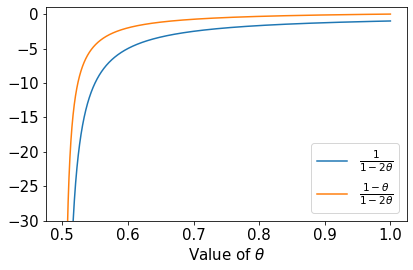

In [3]:
plt.rcParams['font.size'] = 15 

l1, = plt.plot(thetas,rate_y, label = r'$\frac{1}{1 - 2\theta}$') 

l2, = plt.plot(thetas,rate_x, label = r'$\frac{1- \theta}{1 - 2\theta}$') 

plt.legend(handles = [l1,l2]) 

plt.xlabel(r"Value of $\theta$") 

plt.ylim(-30,1) 

plt.tight_layout() 

plt.savefig( './figures/theta.png', dpi = 150) 

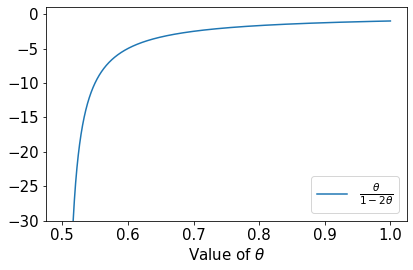

In [4]:
plt.rcParams['font.size'] = 15

l1, = plt.plot(thetas,rate_y, label = r'$\frac{\theta}{1 - 2\theta}$')

# l2, = plt.plot(thetas,rate_x, label = r'$\frac{1- \theta}{1 - 2\theta}$')

plt.legend(handles = [l1], loc = 'lower right')

plt.xlabel(r"Value of $\theta$")

plt.ylim(-30,1)

plt.tight_layout()

plt.savefig( './figures./theta2.png', dpi = 150)

# Eigvalues of Q

In [5]:
Q = pickle.load(open('./raw_data/Q','rb')) 

(array([11.,  3.,  2.,  2.,  1.,  0.,  1.,  1.,  1.,  2.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  1.]),
 array([6.56927451e-04, 6.28375073e-01, 1.25609322e+00, 1.88381136e+00,
        2.51152951e+00, 3.13924765e+00, 3.76696580e+00, 4.39468394e+00,
        5.02240209e+00, 5.65012023e+00, 6.27783838e+00, 6.90555652e+00,
        7.53327467e+00, 8.16099282e+00, 8.78871096e+00, 9.41642911e+00,
        1.00441473e+01, 1.06718654e+01, 1.12995835e+01, 1.19273017e+01,
        1.25550198e+01, 1.31827380e+01, 1.38104561e+01, 1.44381743e+01,
        1.50658924e+01, 1.56936106e+01, 1.63213287e+01, 1.69490468e+01,
        1.75767650e+01, 1.82044831e+01, 1.88322013e+01]),
 <BarContainer object of 30 artists>)

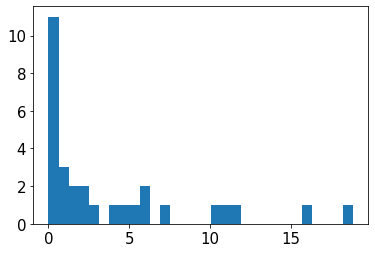

In [6]:
plt.hist( np.linalg.eig(Q)[0] , bins = 30 )

# the toy function

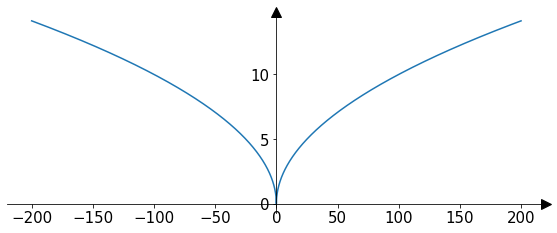

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-200,200,0.01)
y = np.sqrt(np.abs(x))

rc = {"xtick.direction" : "inout", "ytick.direction" : "inout",
      "xtick.major.size" : 5, "ytick.major.size" : 5,}

plt.rcParams['font.size'] = 15 
plt.rcParams['figure.figsize'] = 8,3.5

# with plt.rc_context(rc):
fig, ax = plt.subplots()
ax.plot(x, y) 

# plt.ylim(0,100)

ax.spines['left'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# make arrows
ax.plot((1), (0), ls="", marker=">", ms=10, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)

# plt.show()

plt.tight_layout() 

plt.savefig( './figures/toy.png' , dpi = 150)

# in terms of iterations

In [8]:
# res[1] 

plt.rcParams['font.size'] = 15 

def plot_iter(eta ,k, f = True, small = True): 

#     for k in [1,10,20,30]: 
        
    if small: 
        res = pickle.load(open('./raw_data/newres_k{0}_eta{1}_expsmall'.format(k, eta),'rb')) 
    else: 
        res = pickle.load(open('./raw_data/newres_k{0}_eta{1}_explarge'.format(k, eta),'rb')) 

    if f: 
        m = np.mean( np.array( res )[:,1,:] , axis = 0 ) 
        std = np.std( np.array( res )[:,1,:] , axis = 0 ) 
        plt.plot( m , label = 'with line search' ) 
        plt.fill_between(range(len(m)), m - std, m + std, alpha = 0.4) 

    else: 
        m = np.mean( np.array( res )[:,0,:] , axis = 0 ) 
        std = np.std( np.array( res )[:,0,:] , axis = 0 ) 
        plt.plot( m , label = 'with line search' ) 
        plt.fill_between(range(len(m)), m - std, m + std, alpha = 0.4) 

    if small: 
        res = pickle.load(open('./raw_data/res_k{0}_eta{1}_expsmall'.format(k, eta),'rb')) 
    else: 
        res = pickle.load(open('./raw_data/res_k{0}_eta{1}_explarge'.format(k, eta),'rb')) 

    if f: 
        m = np.mean( np.array( res )[:,1,:] , axis = 0 ) 
        std = np.std( np.array( res )[:,1,:] , axis = 0 ) 
        plt.plot( m , label = 'without line search' ) 
        plt.fill_between(range(len(m)), m - std, m + std, alpha = 0.4) 

    else: 
        m = np.mean( np.array( res )[:,0,:] , axis = 0 )
        std = np.std( np.array( res )[:,0,:] , axis = 0 ) 
        plt.plot( m , label = 'without line search' ) 
        plt.fill_between(range(len(m)), m - std, m + std, alpha = 0.4) 
            
#     if small: 
#         res = pickle.load(open('./raw_data/newres_k{0}_eta{1}_expsmall'.format(k, eta),'rb')) 
#     else: 
#         res = pickle.load(open('./raw_data/newres_k{0}_eta{1}_expsmall'.format(k, eta),'rb')) 

#     if f: 
#         m = np.mean( np.array( res )[:,1,:] , axis = 0 )
#         std = np.std( np.array( res )[:,1,:] , axis = 0 )
# #             l = 
#         plt.plot( m , label = 'GD' ) 
#         plt.fill_between(range(len(m)), m - std, m + std, alpha = 0.4)

#     else: 
#         m = np.mean( np.array( res )[:,0,:] , axis = 0 )
#         std = np.std( np.array( res )[:,0,:] , axis = 0 )

#         plt.plot( m , label = 'GD' ) 
#         plt.fill_between(range(len(m)), m - std, m + std, alpha = 0.4)

    plt.legend() 

    plt.xlabel('Iterations') 
    
    plt.gca().set_yscale('log')
    
    if f: 
        plt.ylabel(r'$f(x)$') 
        plt.xlim([-50, 3000]) 
        plt.ylim([-3, 50]) 
        
    else: 
        plt.ylabel(r'$\| x \|$') 
        plt.xlim([-100, 10000]) 
        plt.ylim([-1, 6.5]) 
        
    plt.rcParams['figure.figsize'] = 6,4

#     plt.tight_layout() 
    
    if (small and f): 
        plt.tight_layout() 
#         plt.show()
        plt.savefig( './figures/lsfig_f_k{}_expsmall_iter_log.png'.format(k) , dpi = 150)
    elif (small and (not f)): 
        plt.tight_layout() 
#         plt.show()
        plt.savefig( './figures/lsfig_x_k{}_expsmall_iter_log.png'.format(k) , dpi = 150)
    elif ((not small) and (not f)): 
        plt.tight_layout() 
#         plt.show()
        plt.savefig( './figures/lsfig_x_k{}_explarge_iter_log.png'.format(k) , dpi = 150)
    else: 
        plt.tight_layout() 
#         plt.show()
        plt.savefig( './figures/lsfig_f_k{}_explarge_iter_log.png'.format(k) , dpi = 150)
        
    plt.clf() 

In [9]:
plot_iter(0.005 , 1, f = True, small = True) 
plot_iter(0.005 , 1, f = False, small = True) 
plot_iter(0.005 , 1, f = True, small = False) 
plot_iter(0.005 , 1, f = False, small = False) 

plot_iter(0.005 , 10, f = True, small = True) 
plot_iter(0.005 , 10, f = False, small = True) 
plot_iter(0.005 , 10, f = True, small = False) 
plot_iter(0.005 , 10, f = False, small = False) 

plot_iter(0.005 , 20, f = True, small = True) 
plot_iter(0.005 , 20, f = False, small = True) 
plot_iter(0.005 , 20, f = True, small = False) 
plot_iter(0.005 , 20, f = False, small = False) 

plot_iter(0.005 , 30, f = True, small = True) 
plot_iter(0.005 , 30, f = False, small = True) 
plot_iter(0.005 , 30, f = True, small = False) 
plot_iter(0.005 , 30, f = False, small = False) 

C:\Users\twang\AppData\Local\Temp\ipykernel_33420\259034437.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([-3, 50])
C:\Users\twang\AppData\Local\Temp\ipykernel_33420\259034437.py:76: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([-1, 6.5])
C:\Users\twang\AppData\Local\Temp\ipykernel_33420\259034437.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([-3, 50])
C:\Users\twang\AppData\Local\Temp\ipykernel_33420\259034437.py:76: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([-1, 6.5])
C:\Users\twang\AppData\Local\Temp\ipykernel_33420\259034437.py:71: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([-3, 50])
C:\Users\twang\App

<Figure size 576x252 with 0 Axes>

In [15]:
# plot_iter_compare(0.001 , f = True, small = True) 
# plot_iter_compare(0.001 , f = False, small = True) 
# plot_iter_compare(0.001 , f = True, small = False) 
# plot_iter_compare(0.001 , f = False, small = False) 